Import packages

In [28]:
import os
import glob
import numpy as np
import rioxarray
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

Read in a random file from Annas polygons I downloaded from Earth Engine.  Bands are dNBR, dNDII, dNDVI and y

/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_training_85/median_721.tif
(475, 380, 3)


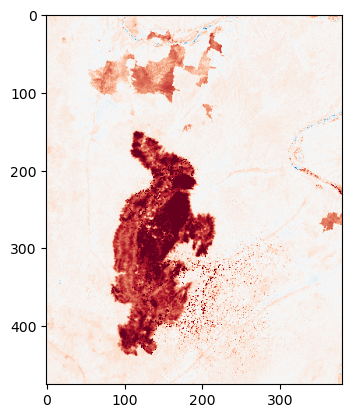

In [43]:
#path to tif files for mtbs
in_path = '/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_training_85'


#randomly select a file
all_files = glob.glob(os.path.join(in_path, '*.tif'))

#get single file
f = random.choice(all_files)

# f = '/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_training_85/median_666.tif'
print(f)

#read in radom file as rasterio
img = rioxarray.open_rasterio(os.path.join(in_path, f))

#tif file
img_np = img.to_numpy()

#flip axis
img_np = np.moveaxis(img_np, 0, 2) 

#remove last band which is target
img_np = img_np[:, :, :-1]

print(img_np.shape)

plt.imshow(img_np[:, :, 0], cmap = 'RdBu_r', vmin = -800, vmax = 800)

I don't think segment anything can take negative data so normalize 0-1 for all data

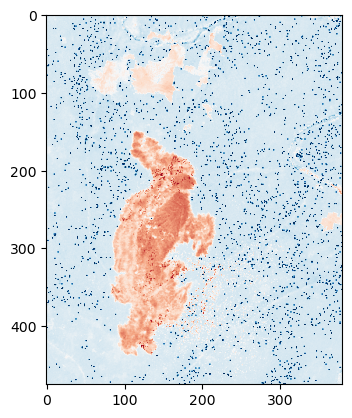

In [44]:
scaler = MinMaxScaler()

img_np = img_np.astype(float)

img_np[img_np == 0] = np.nan

in_shape = img_np.shape

#turn to dataframe to normalize
img_np = img_np.reshape(img_np.shape[0] * img_np.shape[1], img_np.shape[2])

img_np = pd.DataFrame(img_np)

#normalize 0 to 1
img_np = pd.DataFrame(scaler.fit_transform(img_np))

img_np

# img_np = img_np.iloc[2:]

img_np = img_np.values.reshape(in_shape)

img_np[np.isnan(img_np)] = -1

plt.imshow(img_np[:, :, 0], cmap = 'RdBu_r', vmin = 0, vmax = 1)